# This is a Kaggle project to do: New York City Taxi Fare Prediction


Here is the link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

In [1]:
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
#read the data
train = pd.read_csv('train.csv', nrows = 300000)
test = pd.read_csv('test.csv')

In [2]:
train['year'] = train.loc[:,'pickup_datetime'].apply(lambda x: int(x[:4]))
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year
count,300000.000000,300000.000000,300000.000000,299998.000000,299998.000000,300000.000000,300000.000000
mean,11.359876,-72.523230,39.928171,-72.529448,39.927360,1.684403,2011.741063
std,9.932815,11.325144,8.953498,10.914682,6.546706,1.309132,1.861279
min,-44.900000,-740.000000,-3116.285383,-1329.621332,-1189.615440,0.000000,2009.000000
25%,6.000000,-73.992050,40.734985,-73.991350,40.734059,1.000000,2010.000000
50%,8.500000,-73.981762,40.752737,-73.980116,40.753185,1.000000,2012.000000
75%,12.500000,-73.967097,40.767108,-73.963565,40.768095,2.000000,2013.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,2015.000000


In [3]:
test['year'] = test.loc[:,'pickup_datetime'].apply(lambda x: int(x[:4]))
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000


### Clean data
#### We should use the longtitude, latitude and year ranges as the test data. Also the min&max longtitude and latitude in train data also doesn't make sense. So we clean these data. Besides, fare amount and passenger count should larger than 0.

In [4]:
#check how many rows in the original train data
train_len,_=train.shape
train_len

300000

In [5]:
#check how many rows in the test data
test_len,_=test.shape
test_len

9914

In [29]:
#clean the data
train_df = train[(train.pickup_longitude >= -74.3) & (train.pickup_longitude <= -72.8)
                    & (train.dropoff_longitude >= -74.3) & (train.dropoff_longitude <= -72.8)
                   & (train.pickup_latitude >= 40.5) & (train.pickup_latitude <= 41.8)
                   & (train.dropoff_latitude >= 40.5) & (train.dropoff_latitude <= 41.8)
                   & (train.year >= 2009) & (train.year <= 2015)
                 & (train.fare_amount > 0) & (train.passenger_count > 0)]
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year
count,292663.000000,292663.000000,292663.000000,292663.000000,292663.000000,292663.000000,292663.000000
mean,11.347256,-73.975054,40.751111,-73.974050,40.751458,1.690945,2011.740053
std,9.794417,0.038676,0.029673,0.038030,0.032814,1.307711,1.866583
min,0.010000,-74.299372,40.508605,-74.299372,40.505648,1.000000,2009.000000
25%,6.000000,-73.992263,40.736612,-73.991527,40.735617,1.000000,2010.000000
50%,8.500000,-73.982055,40.753469,-73.980557,40.753921,1.000000,2012.000000
75%,12.500000,-73.968323,40.767521,-73.965232,40.768388,2.000000,2013.000000
max,500.000000,-72.856968,41.650000,-72.854940,41.543217,6.000000,2015.000000


In [30]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010


In [31]:
#check how many data we've cleaned
train_df_len,_=train_df.shape
print(train_len-train_df_len, 'rows have been cleaned; and we left', train_df_len, 'rows;',100*(train_len-train_df_len)/train_len, '% data has been cleaned')

7337 rows have been cleaned; and we left 292663 rows; 2.445666666666667 % data has been cleaned


### Pearson correlation

In [32]:
# define the calculation of Euclidean distance
E_dis=np.square(train_df.pickup_longitude-train_df.dropoff_longitude)+np.square(train_df.pickup_latitude-train_df.dropoff_latitude)
# add a new column to calculate diatance
train_df['Euclidean_distance']=np.sqrt(E_dis)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
#pick out the month, day, hour, minute and second information from the datetime
train_df['month'] = train_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[5:7]))
train_df['day'] = train_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[8:10]))
train_df['hours'] = train_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[11:13]))
train_df['minutes'] = train_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[14:16]))
train_df['seconds'] = train_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[17:19]))
train_df['datetime']=pd.to_datetime(train_df['pickup_datetime'])
#add a new column of time of day
train_df['time_of_day'] = train_df.hours + train_df.minutes/60 + train_df.seconds/3600
train_df.head(10)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Euclidean_distance,month,day,hours,minutes,seconds,datetime,time_of_day
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,0.009436,6,15,17,26,21,2009-06-15 17:26:21,17.439167
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,0.079696,1,5,16,52,16,2010-01-05 16:52:16,16.871111
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,0.013674,8,18,0,35,0,2011-08-18 00:35:00,0.583333
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,0.025340,4,21,4,30,42,2012-04-21 04:30:42,4.511667
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,0.019470,3,9,7,51,0,2010-03-09 07:51:00,7.850000
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,2011,0.038675,1,6,9,50,45,2011-01-06 09:50:45,9.845833
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,2012,0.014565,11,20,20,35,0,2012-11-20 20:35:00,20.583333
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,2012,0.045146,1,4,17,22,0,2012-01-04 17:22:00,17.366667
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,2012,0.014258,12,3,13,10,0,2012-12-03 13:10:00,13.166667
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,2009,0.026593,9,2,1,11,0,2009-09-02 01:11:00,1.183333


In [34]:
#the calculation of Pearson correlation
a = train_df['Euclidean_distance'].corr(train_df['fare_amount'])
b = train_df['time_of_day'].corr(train_df['Euclidean_distance'])
c = train_df['time_of_day'].corr(train_df['fare_amount'])
print('Pearson correlation between Euclidean distance of the ride and the taxi fare is:', a, '\n'
    'Pearson correlation between time of day and distance traveled is: ', b, '\n'
     'Pearson correlation between time of day and the taxi fare is: ', c, '\n')

Pearson correlation between Euclidean distance of the ride and the taxi fare is: 0.809702992353 
Pearson correlation between time of day and distance traveled is:  -0.0315293949822 
Pearson correlation between time of day and the taxi fare is:  -0.0202182522503 



#### From above, we know that Euclidean distance of the ride and the taxi fare has the highest correlation, which is around 0.81.

### Create a plot visualizing the relation

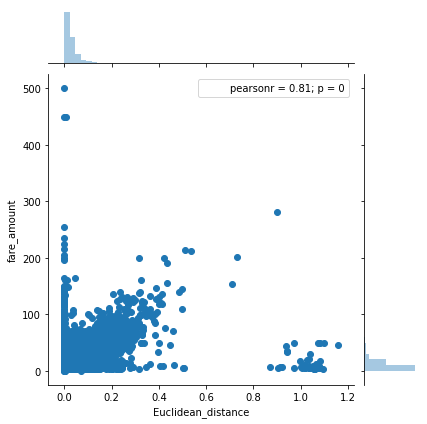

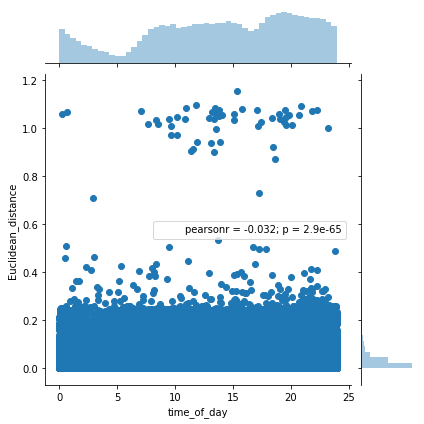

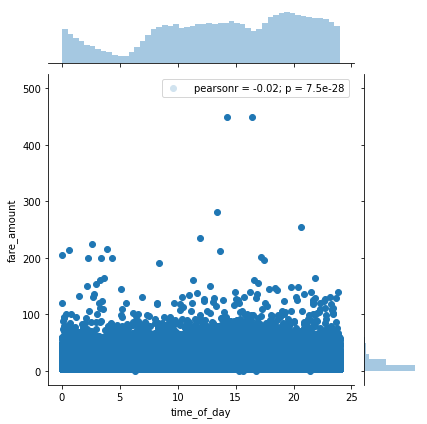

In [35]:
import seaborn as sns
sns.jointplot(x='Euclidean_distance', y='fare_amount',data=train_df)
sns.jointplot(x='time_of_day', y='Euclidean_distance',data=train_df)
sns.jointplot(x='time_of_day', y='fare_amount',data=train_df)
plt.show()

#### The distance and the fare show a linear relationship while the other two showed non-linear relations. The first figure shows the highest Pearson correlation among the three.

### Create an exciting plot 

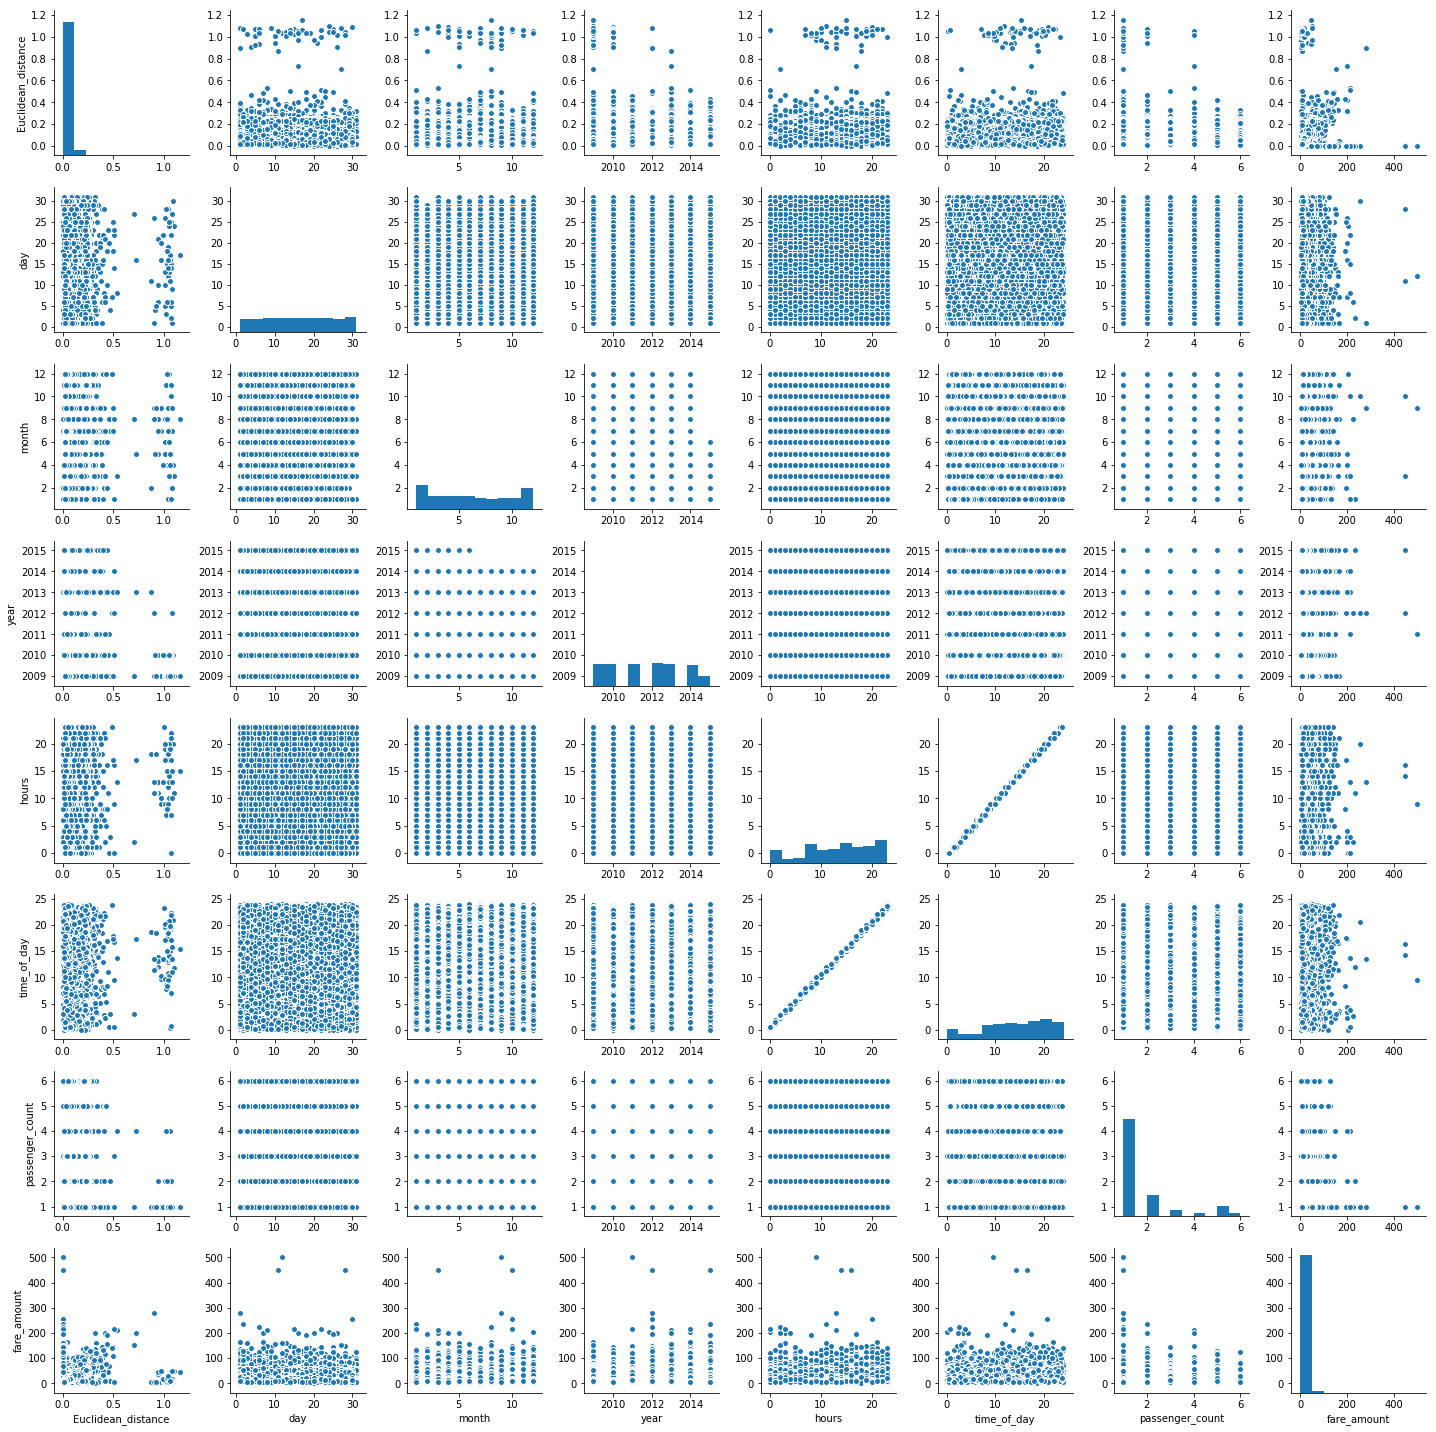

In [36]:
sns.pairplot(train_df, vars=['Euclidean_distance', 'day', 'month', 'year', 'hours', 'time_of_day', 'passenger_count','fare_amount'])
plt.show()

#### This figure shows the factors tha affect fare. From the figure, we can tell that: 
#### 1, the day effect is not obvious, every 15th and 30th the fare amount is smaller for each month, but generally, the fare amount are fluent in a reasonable range. 
#### 2, every Jan, Nov and Dec, the fare amount are relatively less than other month. I think this is because the holidays are more in these months than others. Also during these months, there're more snowdays and people may stay at home instead of going outside. So many people are not going to work. 
#### 3, 2009 and 2010 passengers are less than the latest years, maybe because these two years were just after Global Financial Crisis and many people were off work, so less people took the taxi. But after that more people started going to work, so more people took taxi. 
#### 4, The fare amount shows a small peak round 15:00, maybe because there were more people were off work at that time.
#### 5, Different as I expect, the fare amount and the passenger count desn't show a linear relationship. Instead when the passenger count is 1, the fare amount is the most.
#### 6, passenger count is similar for each hour.

#### There are three main airports in New York: John F. Kennedy International Airport (coordinates are 40.6413° N, 73.7781° W), LaGuardia Airport (coordinates are 40.7769° N, 73.8740° W) and Newark Liberty International Airport (40.6895° N, 74.1745° W). The fare and passengers near the airport may be more than other places.

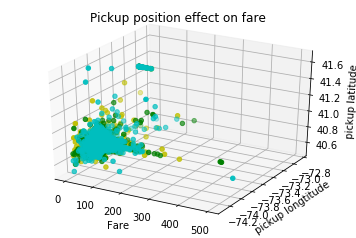

In [37]:
import matplotlib as mpl
# to avoid the OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)
mpl.rcParams['agg.path.chunksize'] = 10000
# the longtitude &latitude may also affect the fare amount, so I plot the relations:
from mpl_toolkits.mplot3d import Axes3D
# Creat a 3D project
ax = plt.subplot(111, projection='3d')  
#seperate the data into three sections
ax.scatter(train_df['fare_amount'][:100000], train_df['pickup_longitude'][:100000], train_df['pickup_latitude'][:100000], c='c')  
ax.scatter(train_df['fare_amount'][100000:200000], train_df['pickup_longitude'][100000:200000], train_df['pickup_latitude'][100000:200000], c='y')
ax.scatter(train_df['fare_amount'][200000:300000], train_df['pickup_longitude'][200000:300000], train_df['pickup_latitude'][200000:300000], c='g')
#axis lable
ax.set_zlabel('pickup latitude')
ax.set_ylabel('pickup longtitude')
ax.set_xlabel('Fare')
plt.title('Pickup position effect on fare')
plt.show()

### Generate additional features
#### I already created some additional features like month, hours in question 2. Here I add weekday and the holiday too. And see how the weekday will affect the fare amount.

In [38]:
#passenger_count & time may show relationship
train_df['weekdayname']=train_df['datetime'].dt.weekday_name
train_df['weekday']=train_df['datetime'].dt.weekday+1
#the holiday may also affect the fare amount
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2009-01-01', end='2015-12-31').to_pydatetime()
train_df['holidat_or_not'] = train_df.pickup_datetime.apply(lambda x: 1 if x in holidays else 0)
#calculate Pearson correlation
d=train_df['weekday'].corr(train_df['fare_amount'])
e=train_df['holidat_or_not'].corr(train_df['fare_amount'])
print('Pearson correlation between the weekday and fare amount is: ', d, '\n'
     'Pearson correlation between the holiday and fare amount is: ', e, '\n')

plt.figure(figsize=(12,15))
plt.subplot(2, 1, 1)
plt.scatter(train_df['weekday'], train_df['fare_amount'],color='b')
plt.xlabel('WeekDay')
plt.ylabel('Fare amount')

plt.subplot(2, 1, 2)
plt.scatter(train_df['holidat_or_not'], train_df['fare_amount'], color='g')
plt.xlabel('Holiday')
plt.ylabel('Fare amount')

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Pearson correlation between the weekday and fare amount is:  0.00180141084107 
Pearson correlation between the holiday and fare amount is:  nan 



Text(0,0.5,'Fare amount')

#### Also, from question 4, we know that the highest fare amount looks like appear near airport. So I want to know how the distance would effect the fare.

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

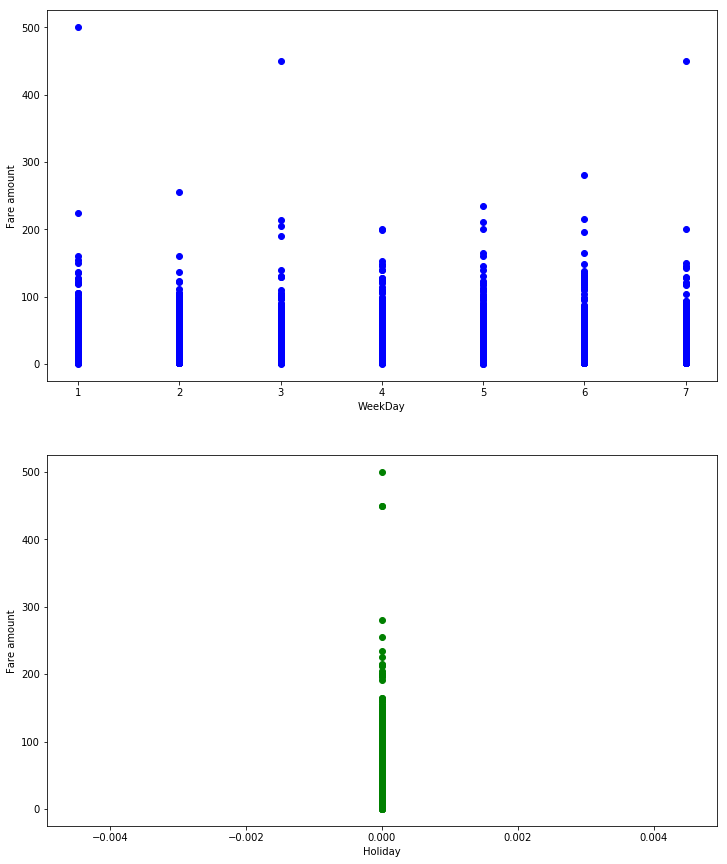

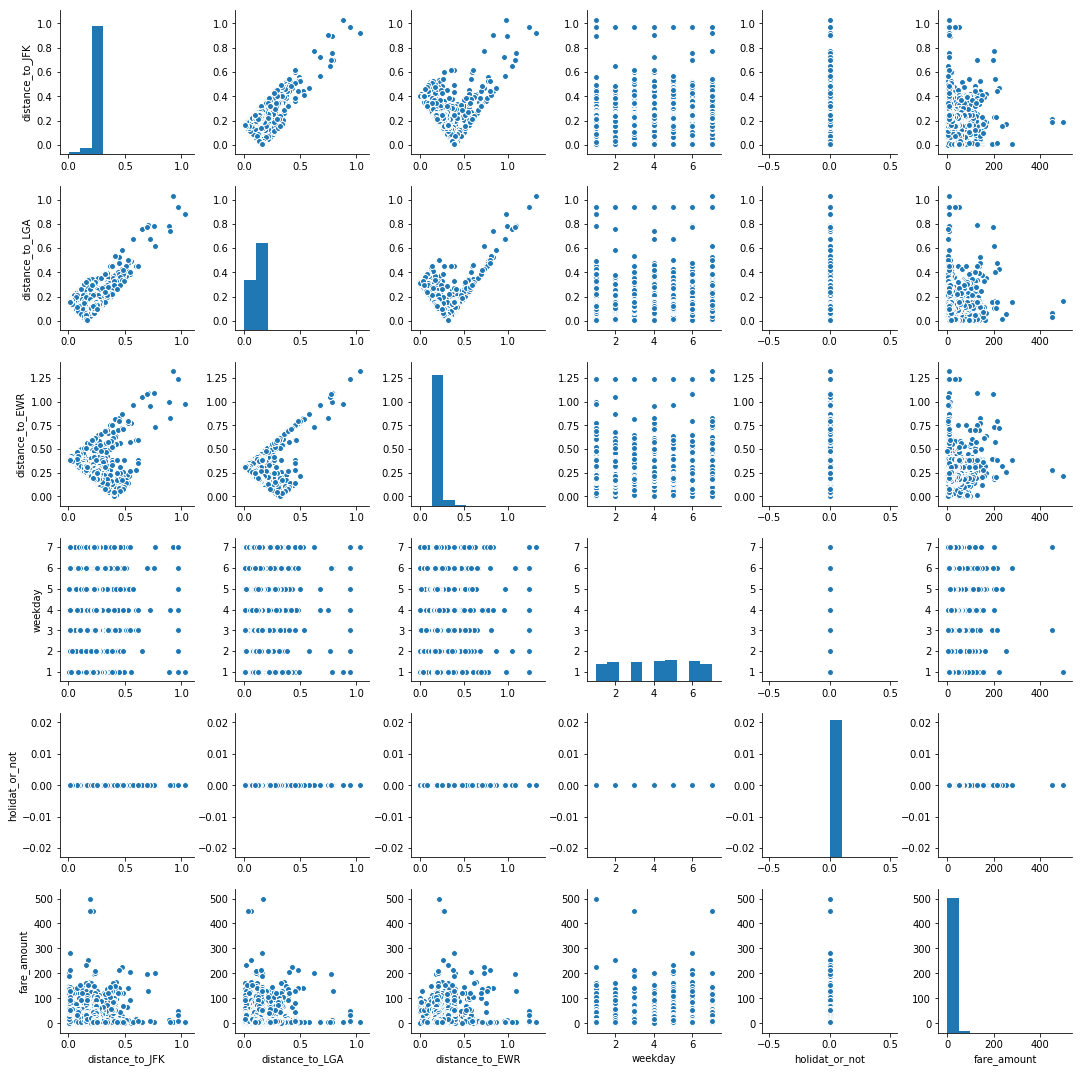

In [39]:
#calculate the Euclidean distance to airport
train_df['distance_to_JFK']=np.sqrt(np.square(train_df.pickup_longitude-(-73.7781))+np.square(train_df.pickup_latitude-40.6413))
train_df['distance_to_LGA']=np.sqrt(np.square(train_df.pickup_longitude-(-73.8740))+np.square(train_df.pickup_latitude-40.7769))
train_df['distance_to_EWR']=np.sqrt(np.square(train_df.pickup_longitude-(-74.1745))+np.square(train_df.pickup_latitude-40.6895))
sns.pairplot(train_df, vars=['distance_to_JFK', 'distance_to_LGA','distance_to_EWR', 'weekday', 'holidat_or_not', 'fare_amount'])
plt.show()

#### add additional features in test data as we added in the test data.

In [40]:
test_df=test
test_df['Euclidean_distance']=np.sqrt(np.square(test_df.pickup_longitude-test_df.dropoff_longitude)+np.square(test_df.pickup_latitude-test_df.dropoff_latitude))
test_df['month'] = test_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[5:7]))
test_df['day'] = test_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[8:10]))
test_df['hours'] = test_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[11:13]))
test_df['minutes'] = test_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[14:16]))
test_df['seconds'] = test_df.loc[:,'pickup_datetime'].apply(lambda x: int(x[17:19]))
test_df['datetime']=pd.to_datetime(test_df['pickup_datetime'])
test_df['weekdayname']=test_df['datetime'].dt.weekday_name
test_df['weekday']=test_df['datetime'].dt.weekday+1
test_df['time_of_day'] = test_df.hours + test_df.minutes/60 + test_df.seconds/3600
test_df['holidat_or_not'] = test_df.pickup_datetime.apply(lambda x: 1 if x in holidays else 0)
test_df['distance_to_JFK']=np.sqrt(np.square(test_df.pickup_longitude-(-73.7781))+np.square(test_df.pickup_latitude-40.6413))
test_df['distance_to_LGA']=np.sqrt(np.square(test_df.pickup_longitude-(-73.8740))+np.square(test_df.pickup_latitude-40.7769))
test_df['distance_to_EWR']=np.sqrt(np.square(test_df.pickup_longitude-(-74.1745))+np.square(test_df.pickup_latitude-40.6895))

#### possible factors:Euclidean_distance, time_of_day, passenger_count, date...

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


The effect of distance_to_JFK can be reflected as follows:
linear model coeff (w): [-108.86780566]
linear model intercept (b): 36.175
R-squared score (training): 0.154
The error is: 8.86318575041


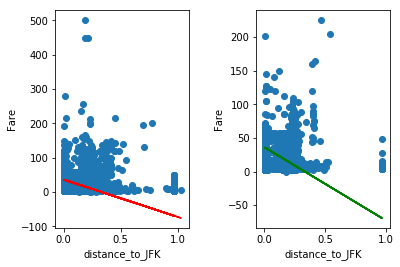

The effect of distance_to_LGA can be reflected as follows:
linear model coeff (w): [-5.61510758]
linear model intercept (b): 11.982
R-squared score (training): 0.000
The error is: 9.66305727773


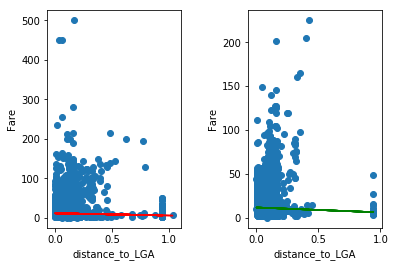

The effect of distance_to_EWR can be reflected as follows:
linear model coeff (w): [ 80.77811183]
linear model intercept (b): -5.627
R-squared score (training): 0.116
The error is: 9.09971636861


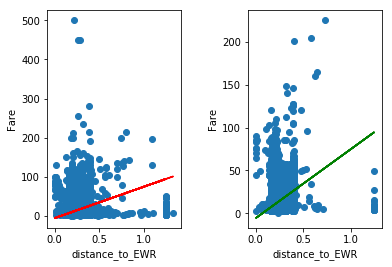

The effect of Euclidean_distance can be reflected as follows:
linear model coeff (w): [ 192.90379571]
linear model intercept (b): 4.754
R-squared score (training): 0.646
The error is: 5.33366156176


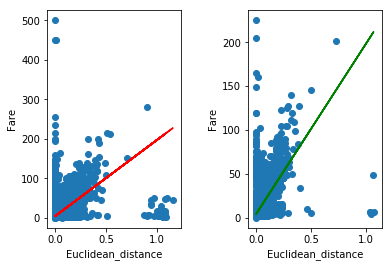

The effect of day can be reflected as follows:
linear model coeff (w): [ 0.00054509]
linear model intercept (b): 11.351
R-squared score (training): 0.000
The error is: 9.66171973321


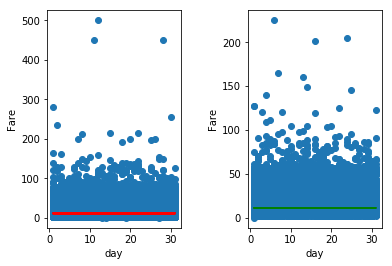

The effect of month can be reflected as follows:
linear model coeff (w): [ 0.06154202]
linear model intercept (b): 10.973
R-squared score (training): 0.000
The error is: 9.65812045372


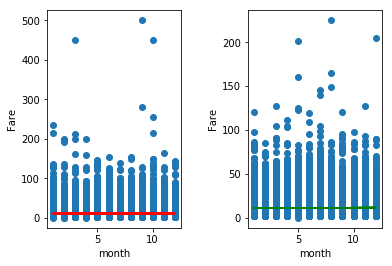

The effect of year can be reflected as follows:
linear model coeff (w): [ 0.61173228]
linear model intercept (b): -1219.287
R-squared score (training): 0.014
The error is: 9.5954746214


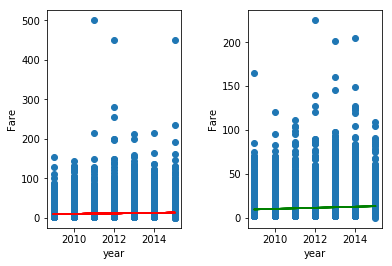

The effect of hours can be reflected as follows:
linear model coeff (w): [-0.03146276]
linear model intercept (b): 11.784
R-squared score (training): 0.000
The error is: 9.6606819311


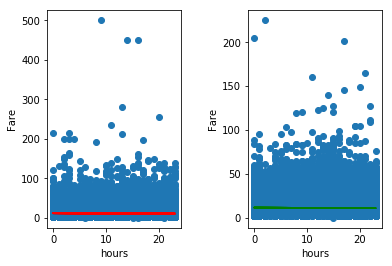

The effect of weekday can be reflected as follows:
linear model coeff (w): [ 0.01275043]
linear model intercept (b): 11.308
R-squared score (training): 0.000
The error is: 9.66176522574


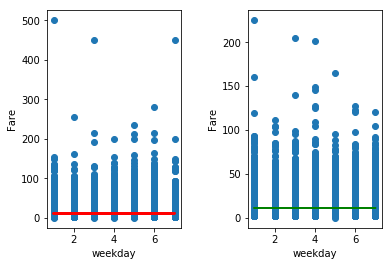

The effect of time_of_day can be reflected as follows:
linear model coeff (w): [-0.03210157]
linear model intercept (b): 11.809
R-squared score (training): 0.000
The error is: 9.66062530022


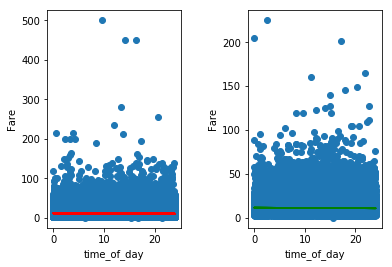

The effect of passenger_count can be reflected as follows:
linear model coeff (w): [ 0.10038394]
linear model intercept (b): 11.190
R-squared score (training): 0.000
The error is: 9.66109476839


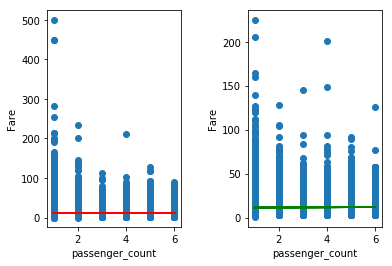

The effect of holidat_or_not can be reflected as follows:
linear model coeff (w): [ 0.]
linear model intercept (b): 11.359
R-squared score (training): 0.000
The error is: 9.66170442535


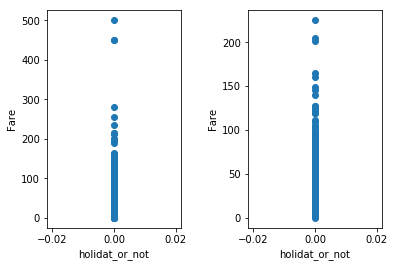

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
features = ['distance_to_JFK', 'distance_to_LGA','distance_to_EWR', 'Euclidean_distance', 'day', 'month', 'year', 'hours', 'weekday', 'time_of_day', 'passenger_count', 'holidat_or_not']
for i in range(len(features)):
    X_i = train_df[features[i]].reshape(-1, 1)
    y_i = train_df['fare_amount']
    X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size=0.2, random_state=42)
    linreg = LinearRegression().fit(X_train, y_train)
    pred = linreg.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test,pred))
    print('The effect of', features[i], 'can be reflected as follows:')
    print('linear model coeff (w): {}'
         .format(linreg.coef_))
    print('linear model intercept (b): {:.3f}'
         .format(linreg.intercept_))
    print('R-squared score (training): {:.3f}'
         .format(linreg.score(X_train, y_train)))
    print('The error is:', error)
    fig,(ax1, ax2) = plt.subplots(1, 2)
    ax1.scatter(X_train, y_train)
    ax1.plot(X_train, linreg.coef_ * X_train + linreg.intercept_, 'r-')
    ax1.set_xlabel(features[i])
    ax1.set_ylabel('Fare')
    
    ax2.scatter(X_test, y_test)
    ax2.plot(X_test, linreg.coef_ * X_test + linreg.intercept_, 'g-')
    ax2.set_xlabel(features[i])
    ax2.set_ylabel('Fare')
    plt.subplots_adjust(wspace =0.5, hspace =0.2)
    plt.show()

#### From above, we can see that by using simple linear regression model, the distance has the most effect on fare

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#### Method I: Linear Regression with Multiple Variables

In [50]:
X = train_df[features]
y = train_df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = LinearRegression()
fit_1 = model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)
error_1 = np.sqrt(mean_squared_error(y_test,pred_1))

print('linear model coeff (w): {}'.format(fit_1.coef_))
print('linear model intercept (b): {:.3f}'.format(fit_1.intercept_))
print('R-squared score (training): {:.3f}'.format(fit_1.score(X_train, y_train)))
print('Linear Regression with Multiple Variables model error is:', error_1)

linear model coeff (w): [ -3.56092060e+01  -1.11900382e+01  -1.30703616e+01   1.87858996e+02
   2.10514478e-03   7.12553092e-02   5.24546586e-01   9.77267643e-02
  -3.04206977e-02  -9.24288959e-02   2.81829073e-02   0.00000000e+00]
linear model intercept (b): -1038.650
R-squared score (training): 0.673
Linear Regression with Multiple Variables model error is: 5.22615896653


#### Method II: RandomForestRegressor

In [44]:
X = train_df[features]
y = train_df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_2 = RandomForestRegressor(n_estimators=30, max_features=None, max_depth=30, min_samples_split=3,
                              min_samples_leaf=3, random_state=0)
fit_2=model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)
error_2 = np.sqrt(mean_squared_error(y_test,pred_2))
print('R-squared score (training): {:.3f}'.format(fit_2.score(X_train, y_train)))
print('RandomForestRegressor model error is:', error_2)

R-squared score (training): 0.913
RandomForestRegressor model error is: 4.13563958685


#### Method III: KNN

In [45]:
model_3 = KNeighborsRegressor(n_neighbors=8)
fit_3 = model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)
error_3 = np.sqrt(mean_squared_error(y_test,pred_3))
print('R-squared score (training): {:.3f}'.format(fit_3.score(X_train, y_train)))
print('RandomForestRegressor model error is:', error_3)

R-squared score (training): 0.169
RandomForestRegressor model error is: 9.98707399929


### Predicte the 'fare_amount' and save file

In [51]:
# Linear Regression with Multiple Variables
prediction_1 = model_1.predict(test_df[features]) 
submission_1 = pd.DataFrame({'key': test_df.key, 'fare_amount': prediction_1},columns = ['key', 'fare_amount'])
submission_1.to_csv('LinearRegression_model_predict.csv', index = False)

# RandomForestRegressor
prediction_2 = model_2.predict(test_df[features]) 
submission_2 = pd.DataFrame({'key': test_df.key, 'fare_amount': prediction_2},columns = ['key', 'fare_amount'])
submission_2.to_csv('RandomForestRegressor_model_predict.csv', index = False)

# KNN
prediction_3 = model_3.predict(test_df[features]) 
submission_3 = pd.DataFrame({'key': test_df.key, 'fare_amount': prediction_3},columns = ['key', 'fare_amount'])
submission_3.to_csv('KNN_model_predict.csv', index = False)